# 핸즈온 사전 단계

- 이벤트 엔진, Cloud Formation 이용: 
    - [핸즈온 준비 필수 단게: Prerequisite](0.0.Prerequisite/CF-Prerequisite.md)
- 이벤트 엔진, 수동 설정: 
    - 이벤트 엔진으로 시작을 안 한다고 하면, 이 과정은 생략하세요.
    - [여기](0.0.Prerequisite/Prerequisite.md) 를 클릭해서 해주세요.
- SageMaker notebook instance 를 이미 가지고 있는 경우
    - SageMaker notebook instance를 실행하는 Role이 아래 4개의 권한을 꼭 가지고 있어야 합니다. 아래 권한을 추가 해주세요. 참고로 위의 수동 설정에는 아래 4가지 권한을 추가하는 과정이 있습니다. 참고 하세요. (AmazonSageMakerFullAccess, AmazonS3FullAccess, AmazonPersonalizeFullAccess, IAMFullAccess)


여기서는 Amazon Personalize 의 기술적인 내용을 정리합니다.

---
참고:
- Amazon Personalize Developer Guide
    - 공식 개발 문서 가이드 입니다.
    - https://docs.aws.amazon.com/personalize/latest/dg/what-is-personalize.html


- Amazon Personalize Samples
    - 공식 에제 Git 저장소 입니다.
    - https://github.com/aws-samples/amazon-personalize-samples


- Recent Blog: Amazon Personalize can now create up to 50% better recommendations for fast changing catalogs of new products and fresh content    
    - 최신 나온 user-personalization 블로그 입니다. 뉴스 기사 같은 상품처럼 시간이 지나면 급속하게 인기가 떨어지는 대한 사례로 사용하기 좋습니다.
    - https://aws.amazon.com/blogs/machine-learning/amazon-personalize-can-now-create-up-to-50-better-recommendations-for-fast-changing-catalogs-of-new-products-and-fresh-content/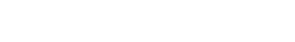